In [68]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from coniferest.isoforest import IsolationForest
from coniferest.pineforest import PineForest

from pathlib import Path

In [29]:
# First of all: load data

from zwad.utils import load_data

def feature_file(oid_file):
    parent = oid_file.parent
    if oid_file.name.startswith('oid_'):
        name = oid_file.name.replace('oid_', 'feature_')
    else:
        name = oid_file.name.replace('sid_', 'feature_')
    
    return parent.joinpath(name)
    

datadir = Path('features', 'dr4_new')
sid_extragal_gr = datadir.joinpath('sid_extragal_short_gr_100.dat')
feature_extragal_gr = feature_file(sid_extragal_gr)

fakesdir = Path('features', 'fakes')
sid_fakes = list(fakesdir.glob('oid_*.dat'))
feature_fakes = [feature_file(s) for s in sid_fakes]

sids, features = load_data([sid_extragal_gr] + sid_fakes, [feature_extragal_gr] + feature_fakes)

In [39]:
%%time

# Perform calculations of outliers

isoforest = IsolationForest(n_subsamples=1024, n_trees=1000)
isoforest.fit(features)
scores = isoforest.score_samples(features)
ordered_sids = sids[np.argsort(scores)]
detection_curve = np.cumsum(ordered_sids < 1e10)

CPU times: user 1h 5min 52s, sys: 1min 9s, total: 1h 7min 1s
Wall time: 1min


<IPython.core.display.Javascript object>


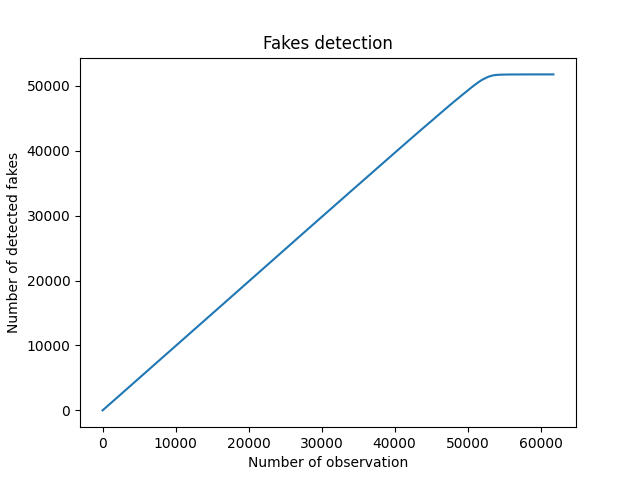

In [69]:
# Plot the detection curve

n_fakes = detection_curve[-1]

plt.plot(detection_curve[:n_fakes+10000])
plt.xlabel('Number of observation')
plt.ylabel('Number of detected fakes')
plt.title('Fakes detection')
pass

In [70]:
fake_trees = PineForest.filter_trees(isoforest.trees, features[-n_fakes:], np.full(n_fakes, -1), 950)

In [ ]:
fake_trees[0].apply(features[-100:])

In [ ]:
fake_trees[0].__getstate__()

In [ ]:
fake_trees[1].apply(features[-100:])

In [ ]:
fake_trees[1].__getstate__()

<IPython.core.display.Javascript object>


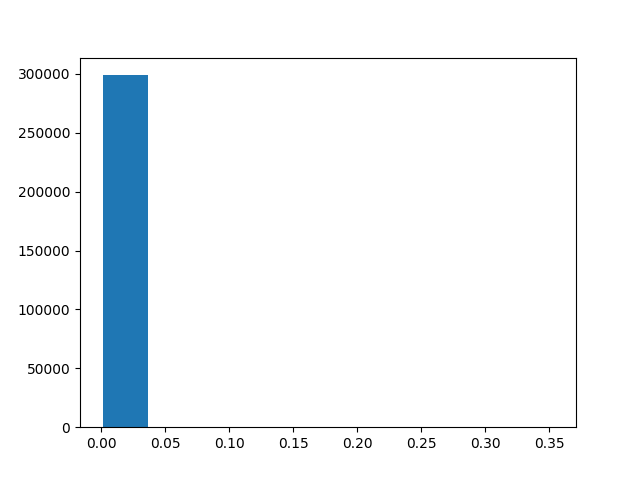

(array([2.98813e+05, 1.39000e+02, 6.00000e+00, 1.06000e+02, 2.54000e+02,
        1.11000e+02, 2.70000e+01, 1.00000e+01, 7.00000e+00, 1.00000e+00]),
 array([0.00125547, 0.03646338, 0.07167128, 0.10687919, 0.1420871 ,
        0.17729501, 0.21250291, 0.24771082, 0.28291872, 0.31812665,
        0.35333455], dtype=float32),
 <BarContainer object of 10 artists>)

In [86]:
plt.hist(features[::100, 77])

# Lets look at the feature 77

In [87]:
# These are fake values:

features[-20:, 77]

array([0.15997122, 0.19782211, 0.1577625 , 0.19958016, 0.17658608,
       0.15354647, 0.12272645, 0.15241683, 0.17526542, 0.13206255,
       0.13965298, 0.13042137, 0.15573299, 0.19039299, 0.18218234,
       0.15994397, 0.12823987, 0.19276436, 0.13184838, 0.13566624],
      dtype=float32)

In [88]:
# These are regular values:

features[:20, 77]

array([0.00328615, 0.00287628, 0.00385287, 0.00285853, 0.00336633,
       0.00312786, 0.004807  , 0.00284427, 0.00281923, 0.00270276,
       0.00391896, 0.00296661, 0.00282393, 0.00339313, 0.00331687,
       0.00311736, 0.00305523, 0.00278321, 0.00295516, 0.00487505],
      dtype=float32)

Isolation Forest too unambigously discriminates fakes from regular data. There should be some kind of bug.